In [1]:
%load_ext autoreload
%autoreload 2

In [30]:
from thymio import Thymio
import numpy as np

thymio = Thymio()

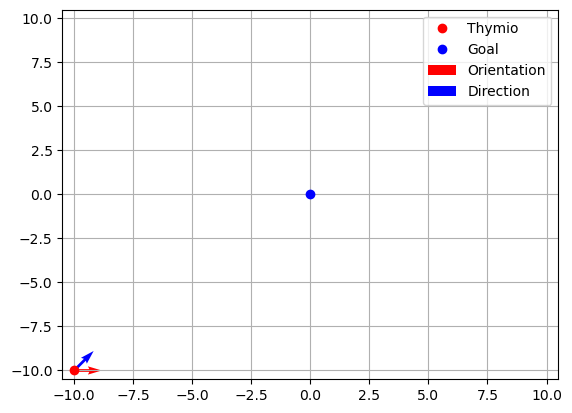

In [62]:
position = np.array([-10, -10])
goal = np.array([0, 0])
orientation = 0 * np.pi / 180

thymio.set_position(position)
thymio.set_goal(goal)
thymio.set_orientation(orientation)

thymio.plot_direction(goal)

In [68]:
from run_EKF import run_EKF
from ExtendedKF import KalmanFilterExtended
import time

pos_x, pos_y = thymio.position
theta = thymio.orientation
wheels_data = thymio.get_wheels_speed()

ekf = KalmanFilterExtended([pos_x, pos_y, theta], wheels_data)
for i in range(10):
    print("Position before: ", pos_x, pos_y)
    print("Orientation before: ", theta)
    print("Wheels data: ", wheels_data)
    
    # print(thymio.position, thymio.orientation)
    pos_x, pos_y, theta, left_wheel, right_wheel = run_EKF(ekf, pos_x, pos_y, theta, wheels_data)
    print("Position: ", pos_x, pos_y)
    print("Orientation: ", theta)
    print("Left wheel: ", left_wheel)
    print("Right wheel: ", right_wheel)
    
    thymio.set_position(np.array([pos_x, pos_y]))
    thymio.set_orientation(theta)
    thymio.move_to_point_astolfi(goal)
    time.sleep(1)
    
    pos_x, pos_y = thymio.position
    theta = thymio.orientation
    wheels_data = thymio.get_wheels_speed()

Position before:  -10.0 -10.0
Orientation before:  0.0
Wheels data:  [0 0]
Position:  -10.0 -10.0
Orientation:  0.0
Left wheel:  0.0
Right wheel:  0.0
Position before:  -10.0 -10.0
Orientation before:  0.0
Wheels data:  [53 86]
Position:  -10.0 -10.0
Orientation:  0.0
Left wheel:  0.0
Right wheel:  0.0
Position before:  -10.0 -10.0
Orientation before:  0.0
Wheels data:  [52 80]
Position:  -10.0 -10.0
Orientation:  0.0
Left wheel:  0.0
Right wheel:  0.0
Position before:  -10.0 -10.0
Orientation before:  0.0
Wheels data:  [49 88]
Position:  -10.0 -10.0
Orientation:  0.0
Left wheel:  0.0
Right wheel:  0.0
Position before:  -10.0 -10.0
Orientation before:  0.0
Wheels data:  [50 88]
Position:  -10.0 -10.0
Orientation:  0.0
Left wheel:  0.0
Right wheel:  0.0
Position before:  -10.0 -10.0
Orientation before:  0.0
Wheels data:  [51 87]
Position:  -10.0 -10.0
Orientation:  0.0
Left wheel:  0.0
Right wheel:  0.0
Position before:  -10.0 -10.0
Orientation before:  0.0
Wheels data:  [54 89]
Positio

In [27]:
thymio.move_to_point_astolfi(goal, verbose=True)

Orientation:  0.3490658503988659
Rho:  14.142135623730951
Dy:  -10
Dx:  -10
Left motor:  131.57914181070905
Right motor:  9.842214426600457


In [69]:
thymio.stop()

In [29]:
thymio.__del__()